Numerically solve the non-linear pendulum differential equation:
$\frac{d^2\theta}{dt^2} + \frac{c}{m}\frac{d\theta}{dt} + \frac{g}{L}\sin(\theta) = 0$

Transform second-order equation into a system of first-order differential equations.
Let $w = \frac{d\theta}{dt}$. The system is:

$\begin{cases}
    w = \frac{d\theta}{dt}\\
    \frac{dw}{dt} = - \frac{c}{m}w - \frac{g}{L}\sin(\theta)\\
\end{cases}$


In [14]:
#Initialize
import math
import matplotlib.pyplot as pyp
import imageio
simulation_duration = 20 #in seconds
step_size = 0.001 #in seconds

initial_angle = math.pi/2 #in rads
initial_velocity = 0 #in rad/s

dampening_coefficient = .16 #in Ns/m
mass = .5 #in kg
length = 1.2 #in meters
g = 9.81 #(m/s^2)

In [15]:
cBym = dampening_coefficient/mass #precompute ratios
gByL = g/length 
number_of_steps = int(simulation_duration/step_size)
rad2deg = 180/math.pi

time_vector = [0] * (number_of_steps+1)
angle_vector = [0] * (number_of_steps+1)
velocity_vector = [0] * (number_of_steps+1)

#Euler Method approach to solving the Differential Equation
def EulerMethod(nSteps, stepSize, IV1, IV2, const1, const2, time, angle, velocity):
    i = 0
    time[0] = 0
    angle[0] = IV1
    velocity[0] = IV2

    dwdt = lambda w, theta: -const1*w - const2*math.sin(theta)

    while i < nSteps:
        time[i+1] = time[i] + stepSize
        angle[i+1] = angle[i] + stepSize*velocity[i]
        velocity[i+1] = velocity[i] + stepSize*dwdt(velocity[i], angle[i])
        i = i + 1

In [16]:
EulerMethod(number_of_steps, step_size, initial_angle, initial_velocity, cBym, gByL, time_vector, angle_vector, velocity_vector)

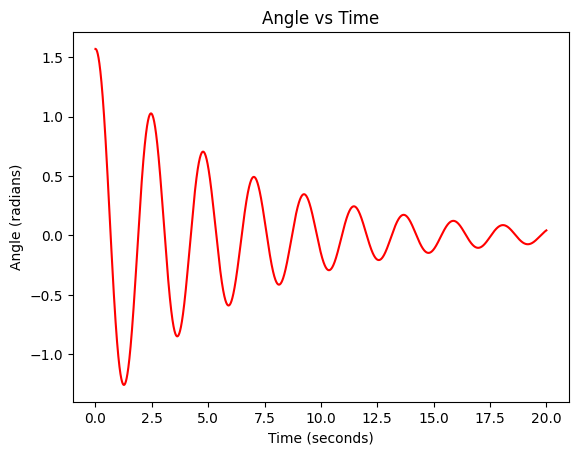

In [17]:
x = time_vector
y = angle_vector

pyp.title("Angle vs Time")
pyp.xlabel("Time (seconds)")
pyp.ylabel("Angle (radians)")
pyp.plot(x, y, color = "red")
pyp.show()

C:\Users\David\AppData\Local\Temp\ipykernel_23056\2535944060.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = pyp.figure(figsize=(6,6))


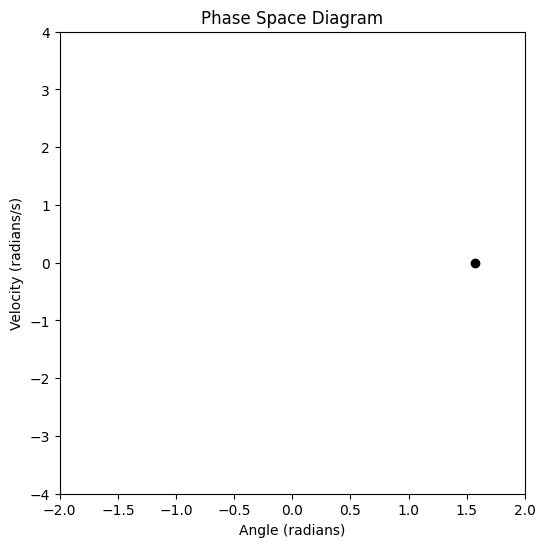

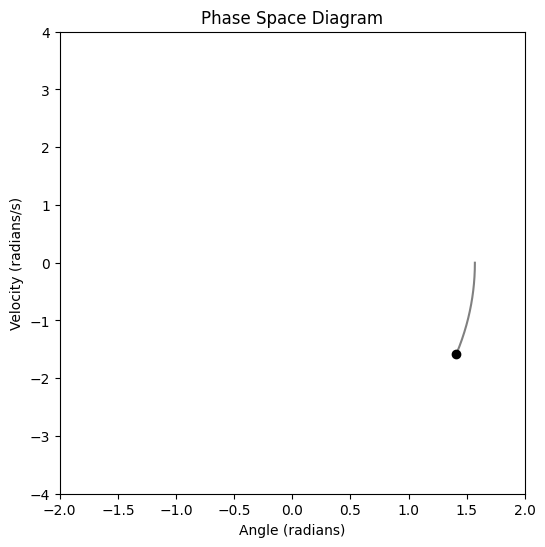

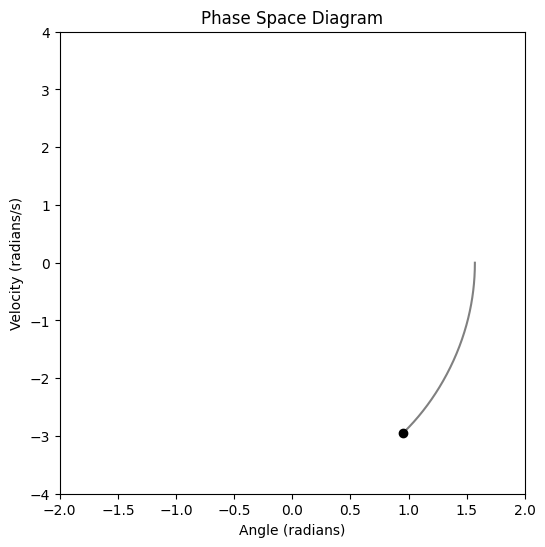

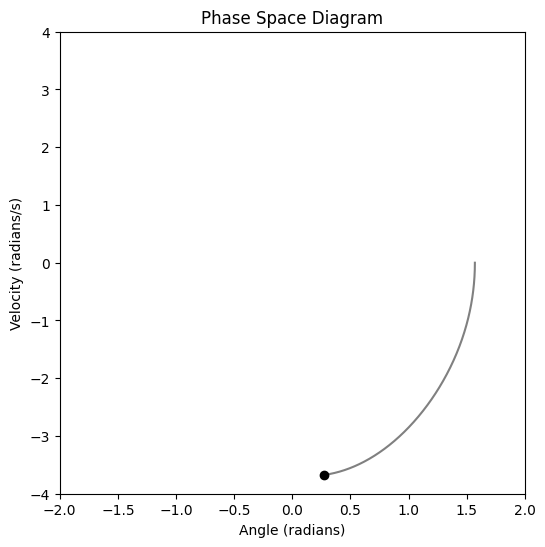

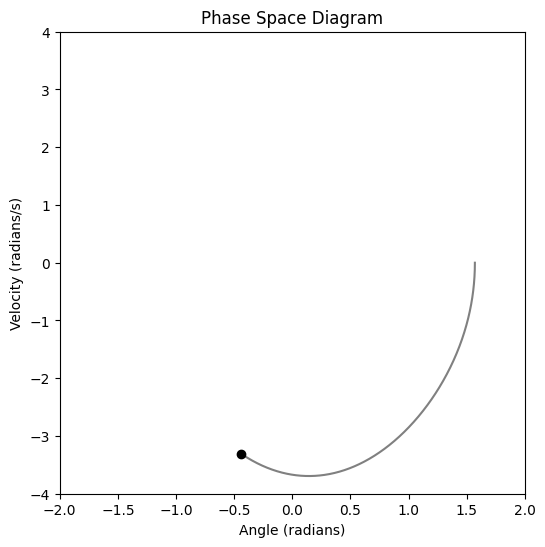

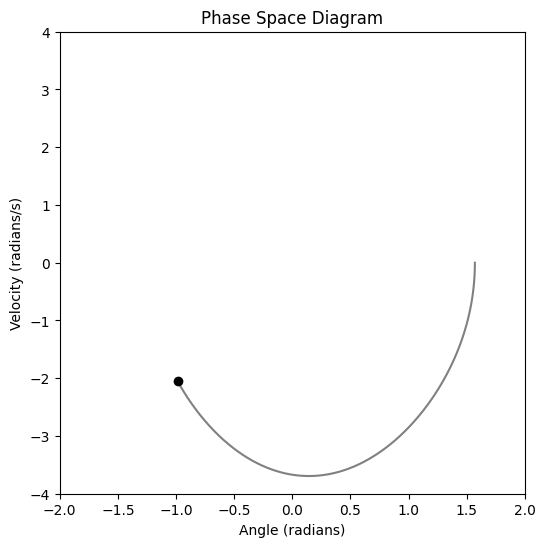

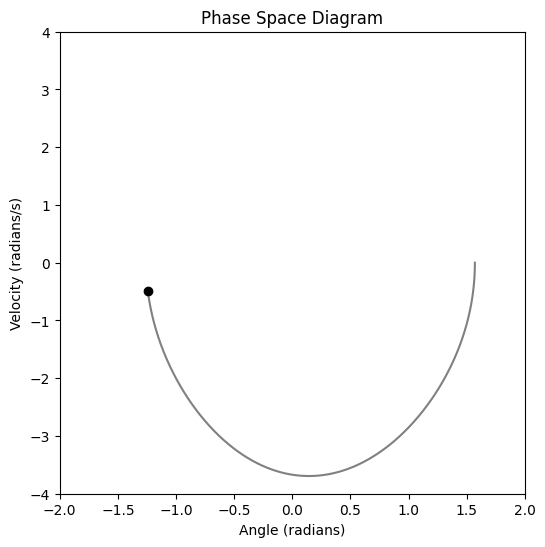

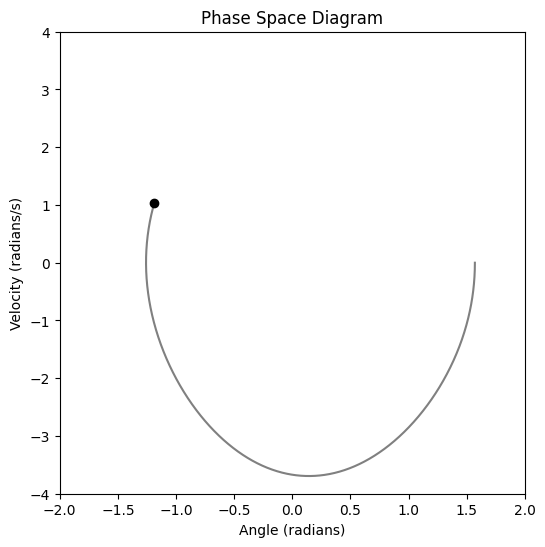

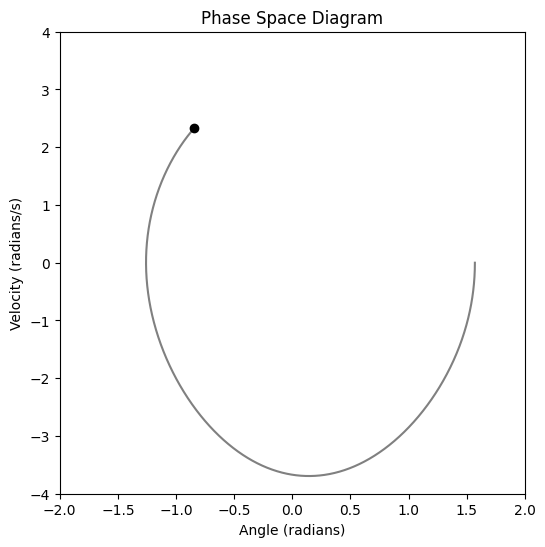

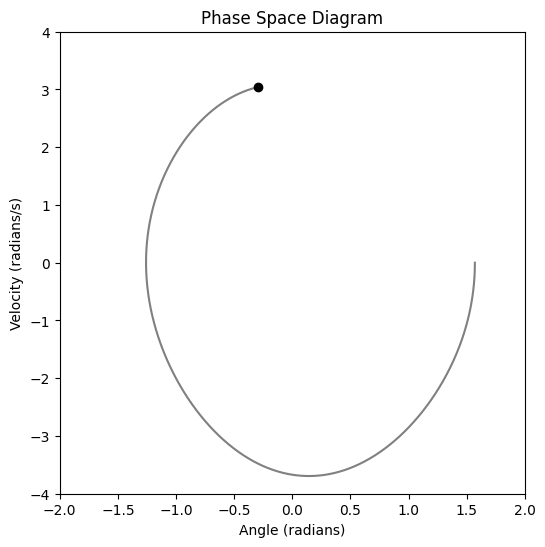

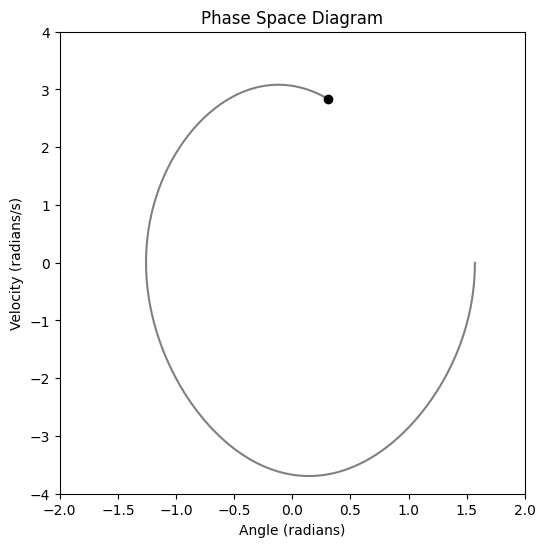

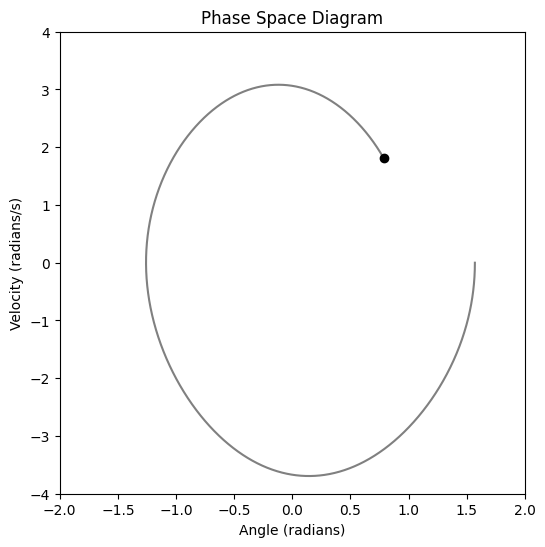

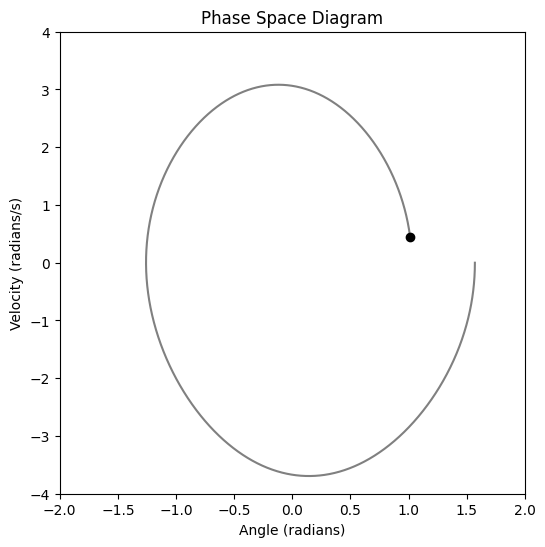

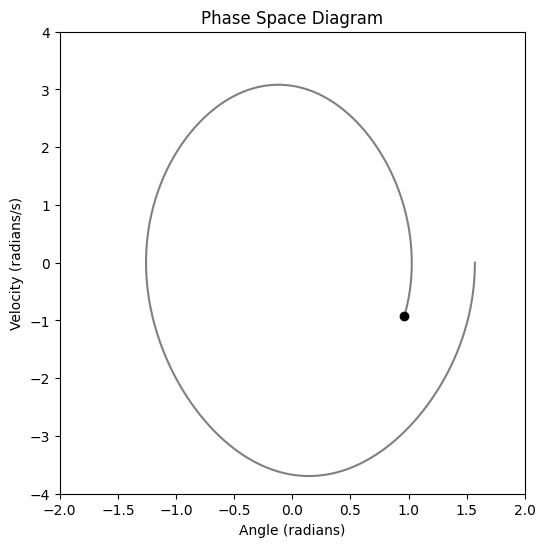

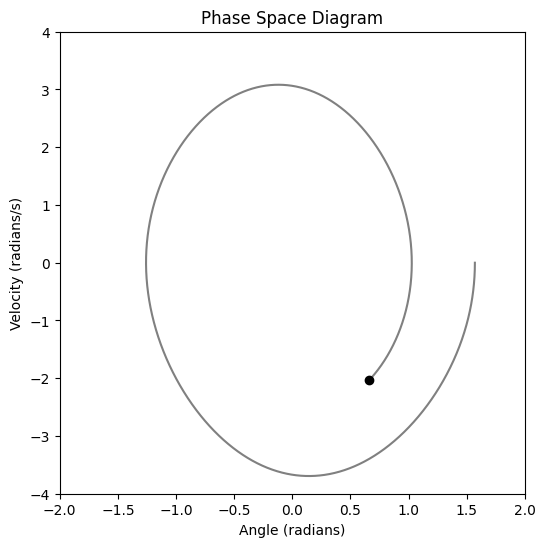

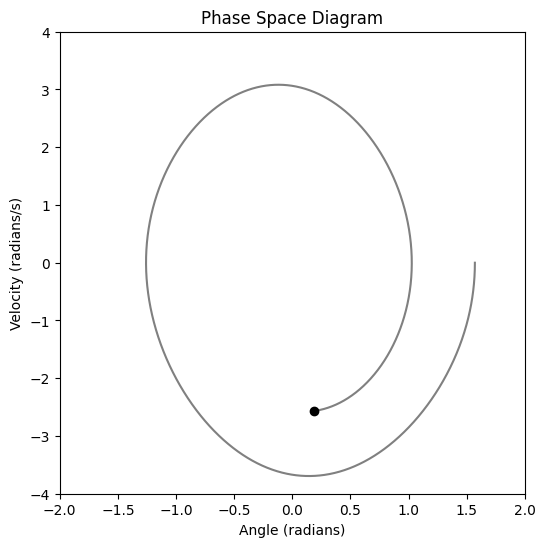

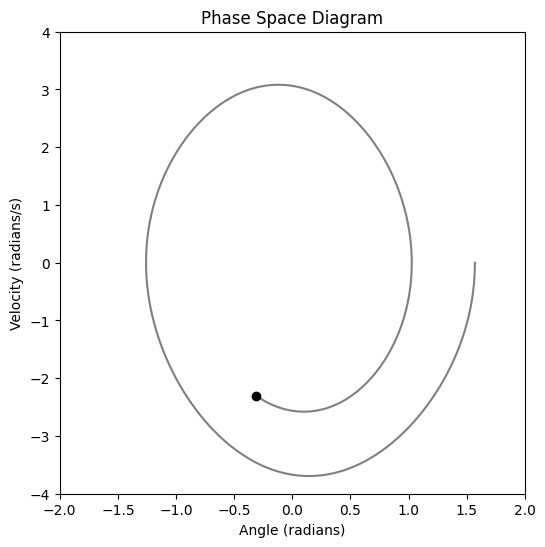

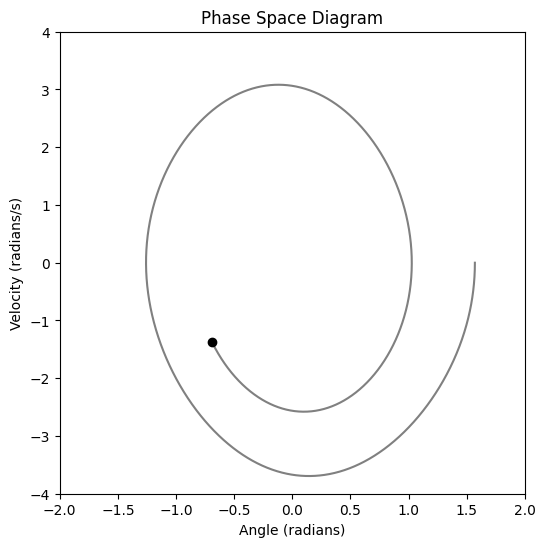

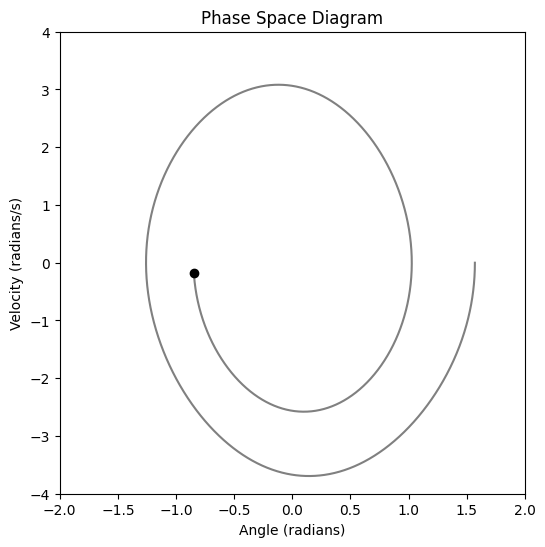

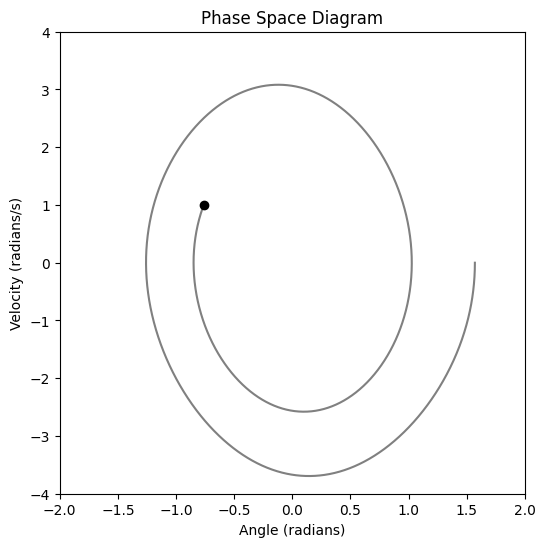

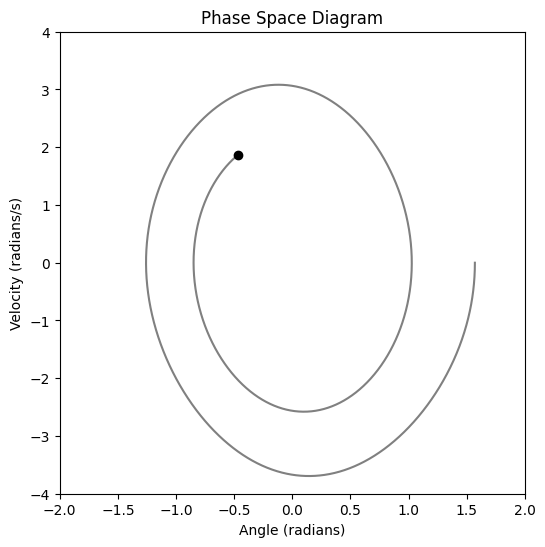

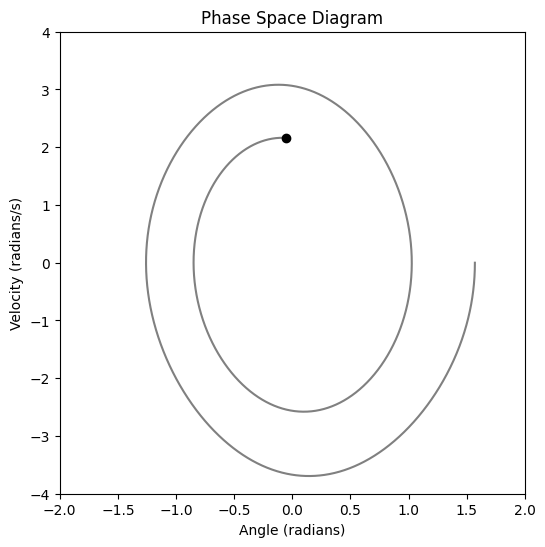

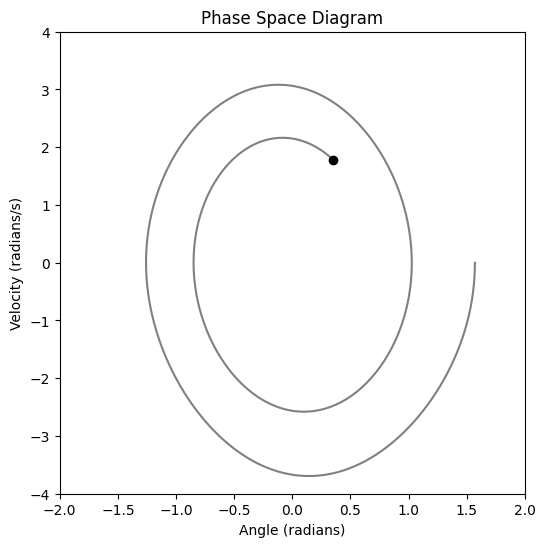

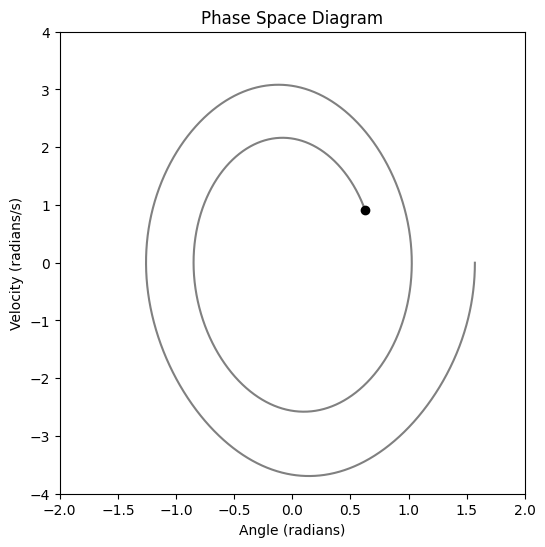

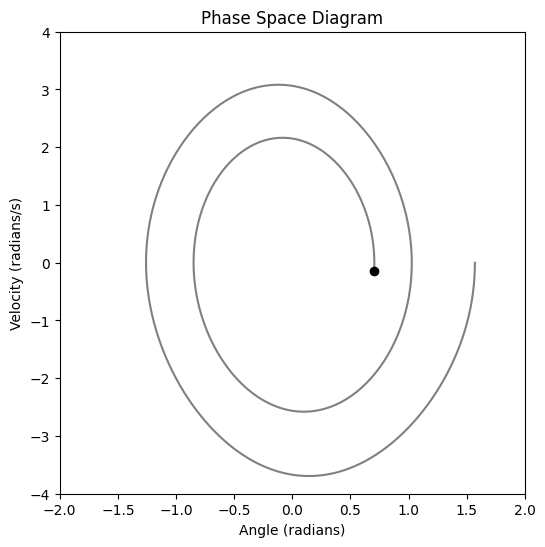

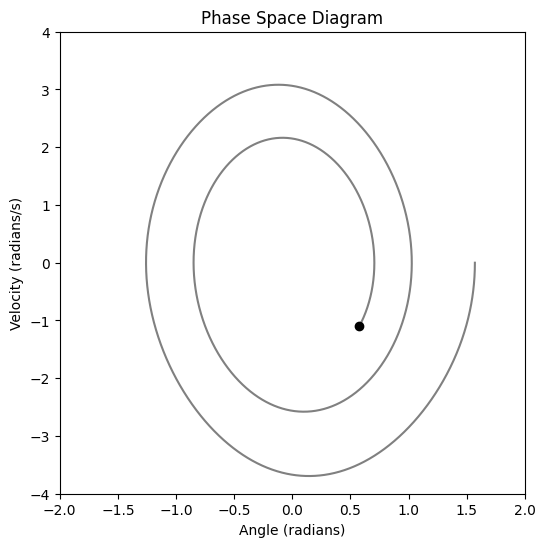

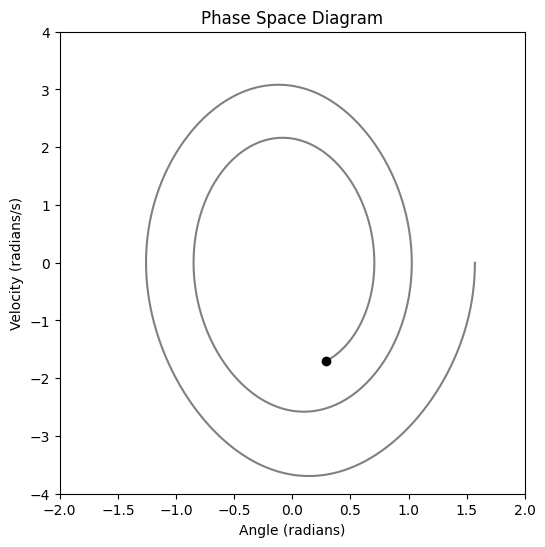

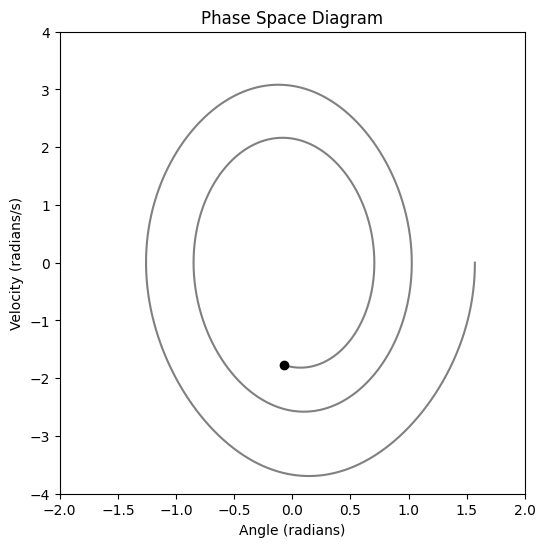

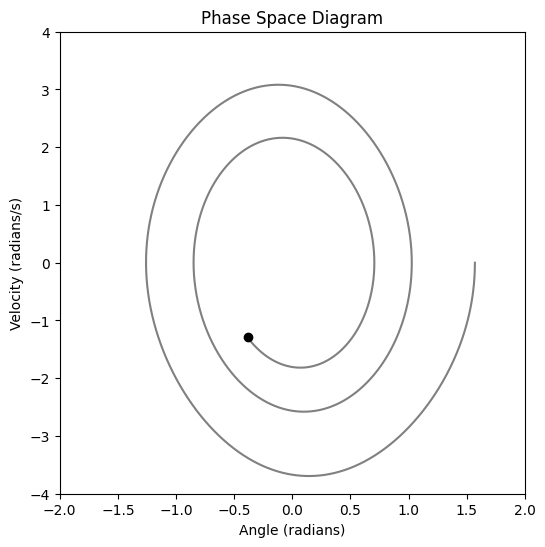

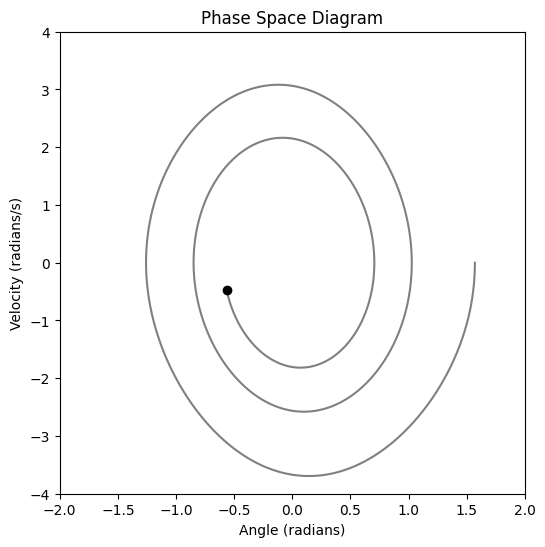

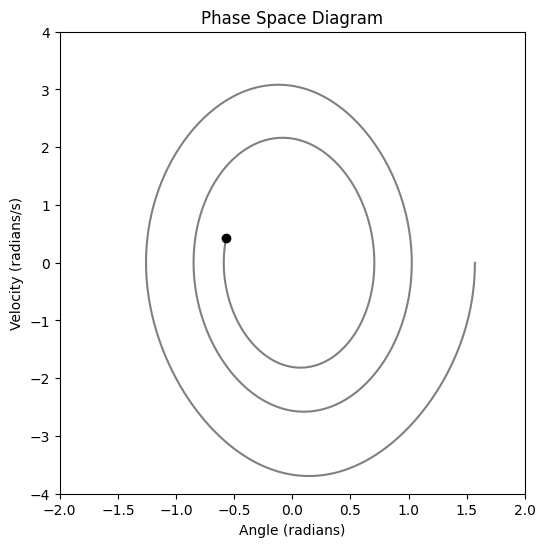

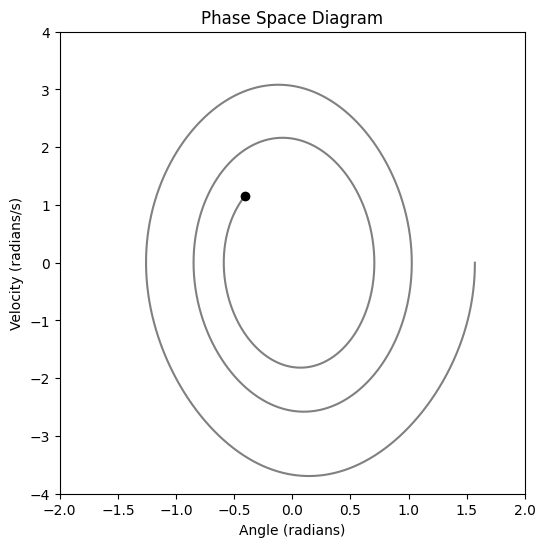

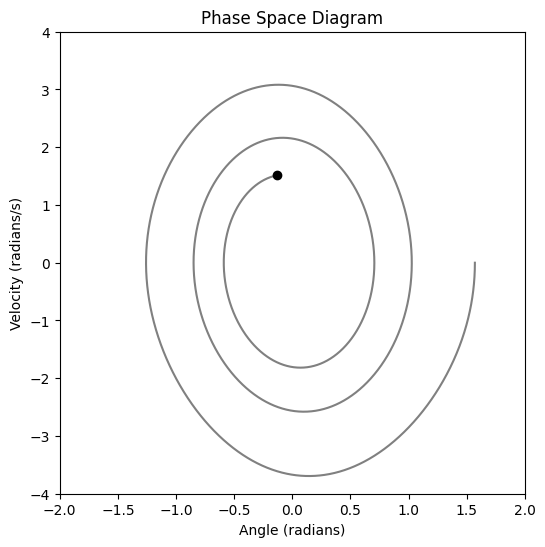

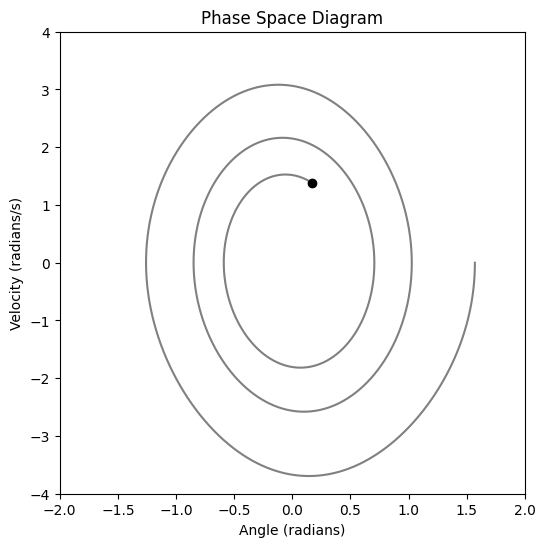

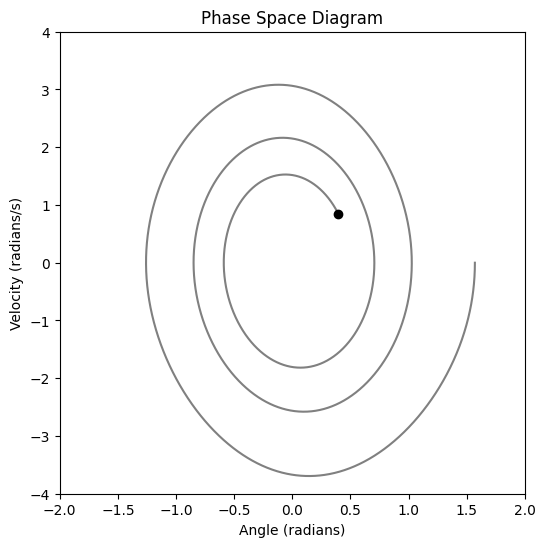

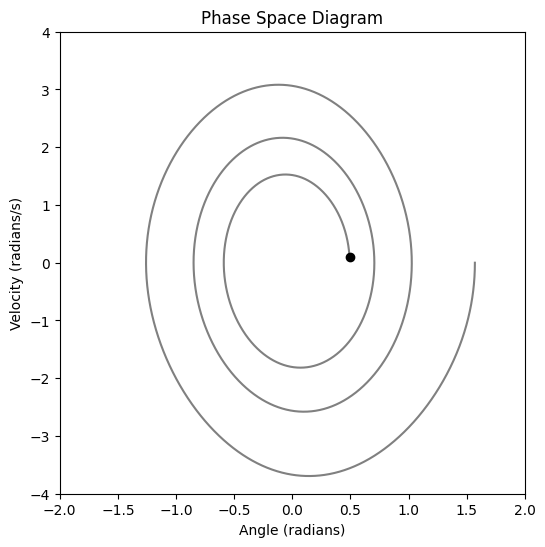

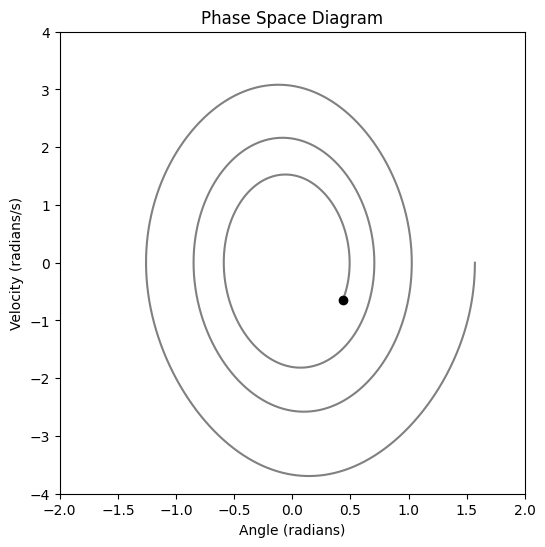

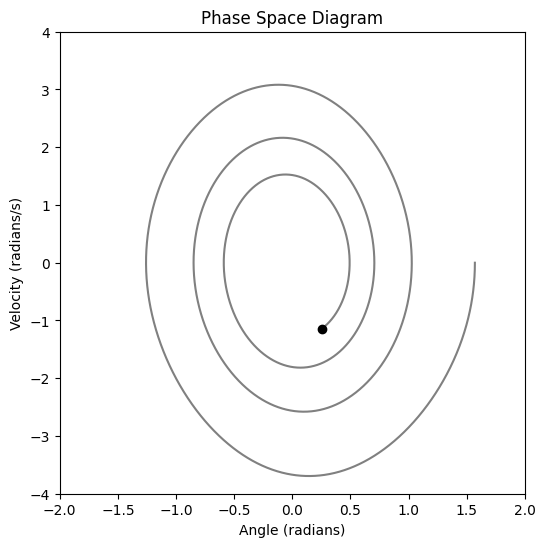

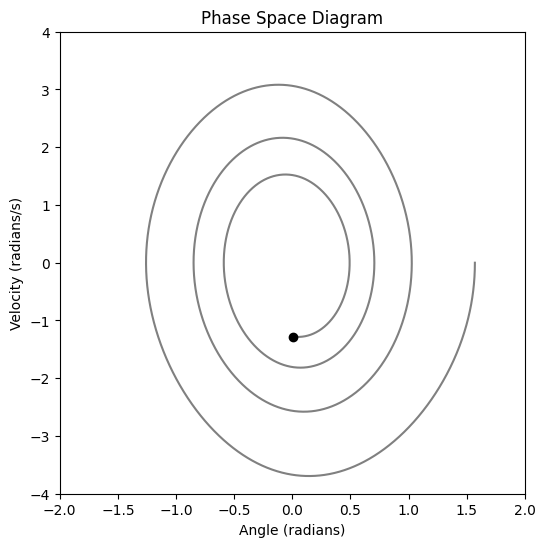

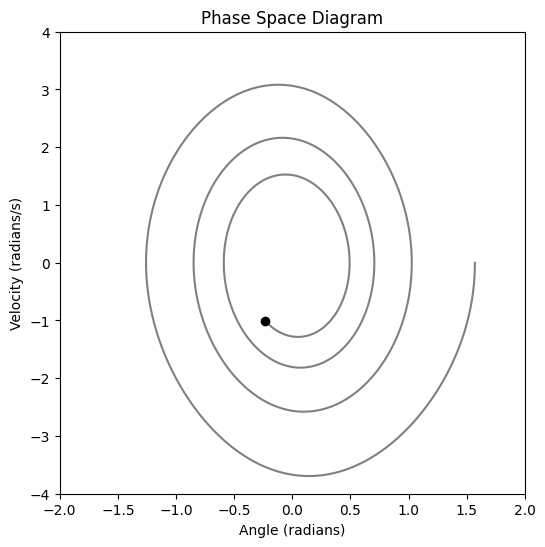

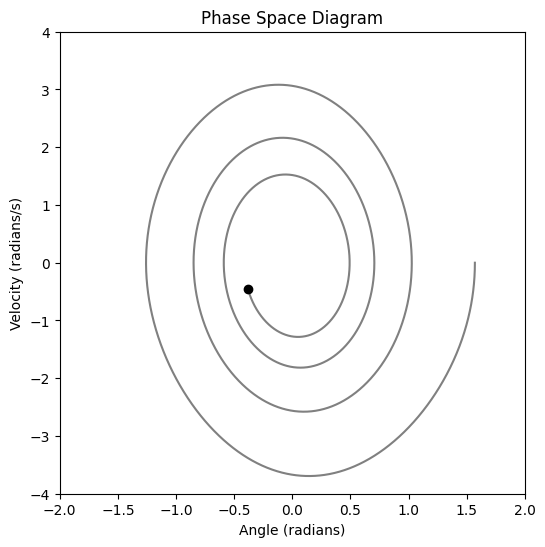

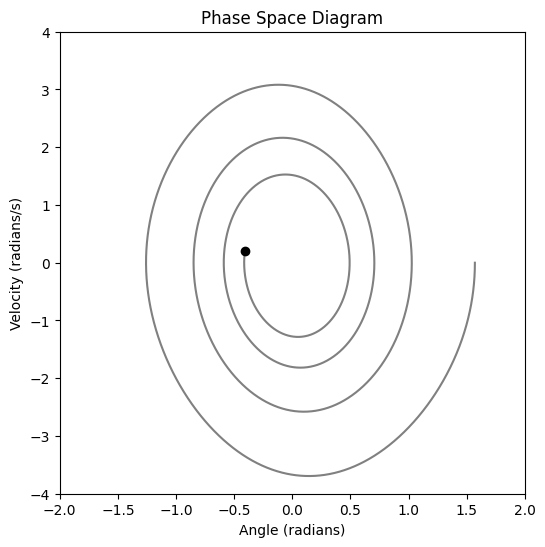

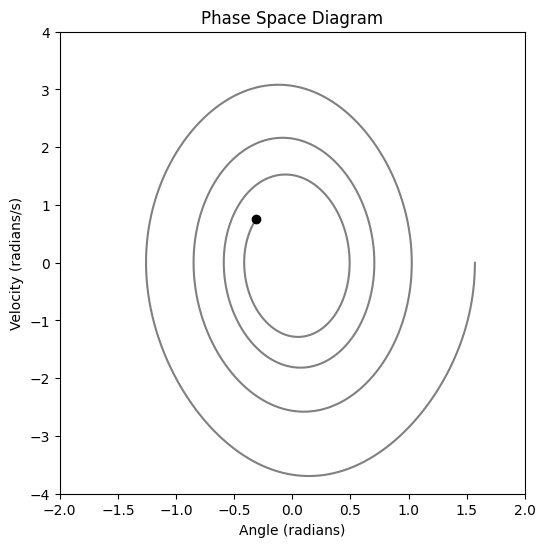

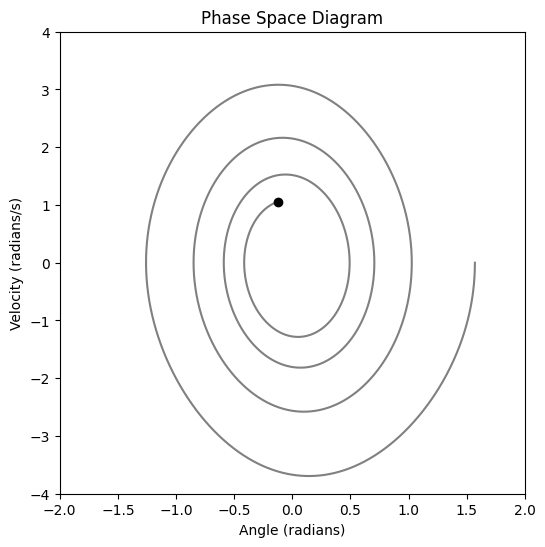

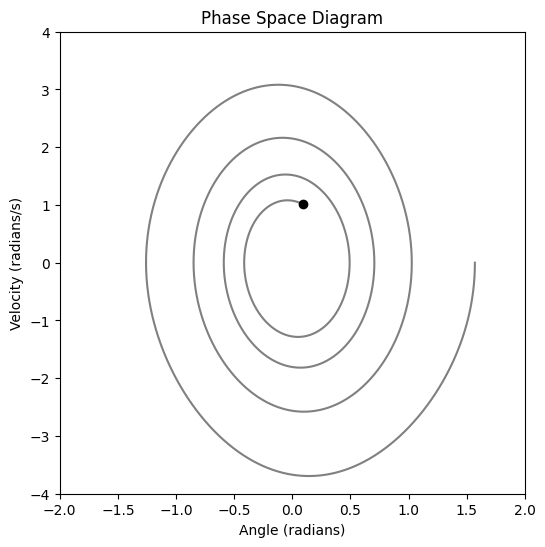

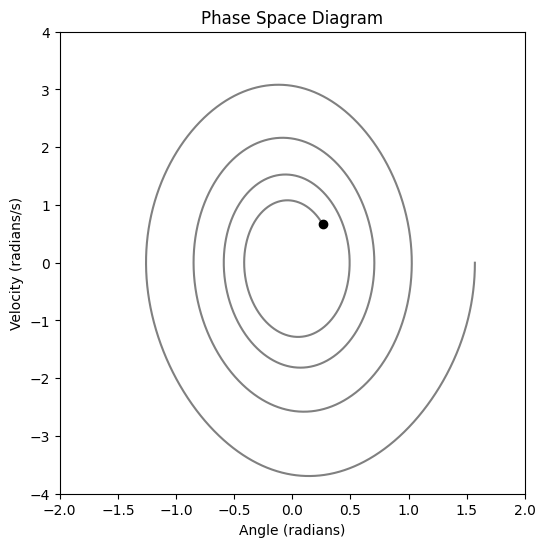

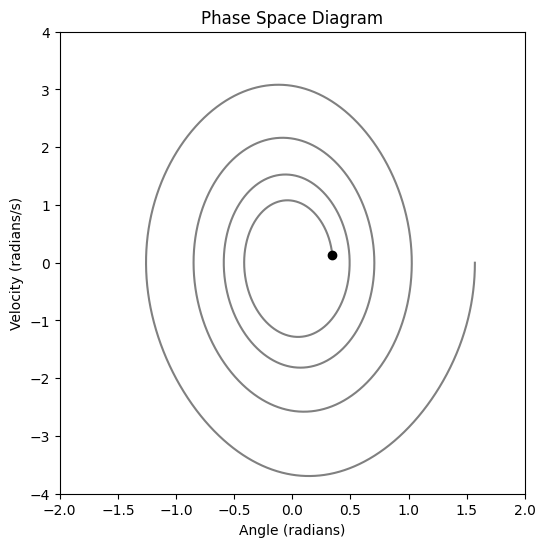

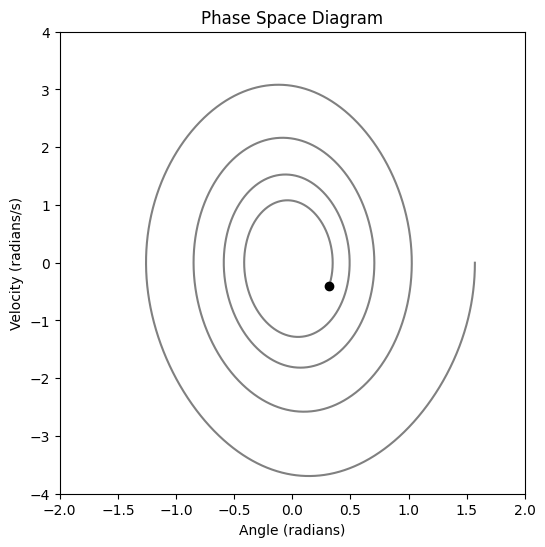

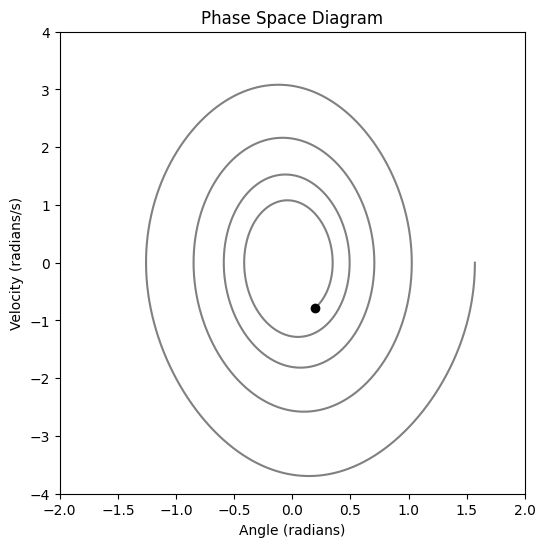

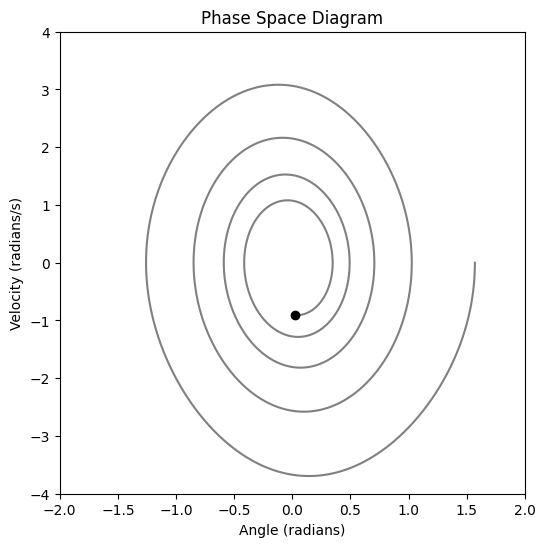

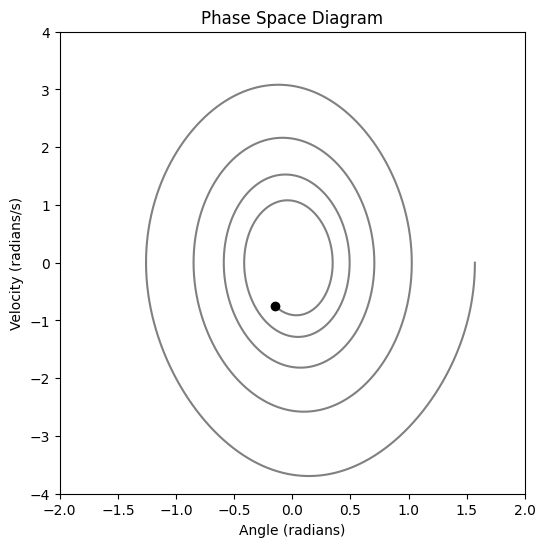

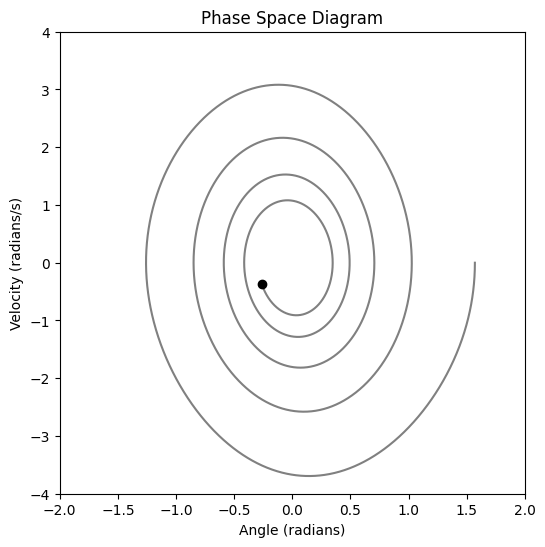

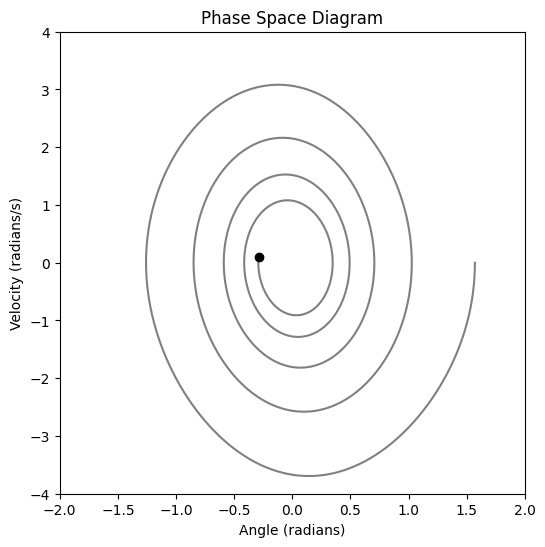

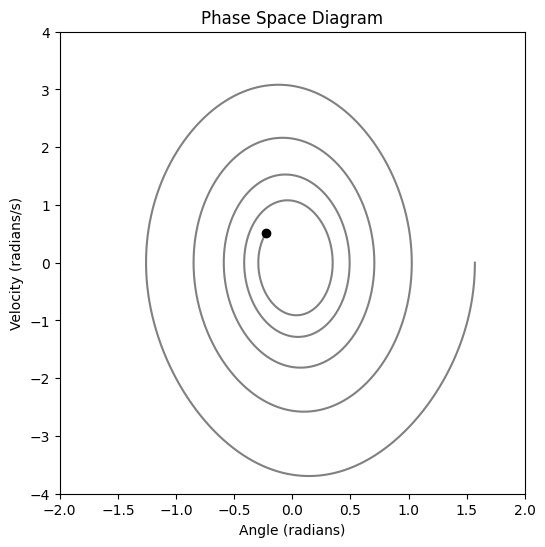

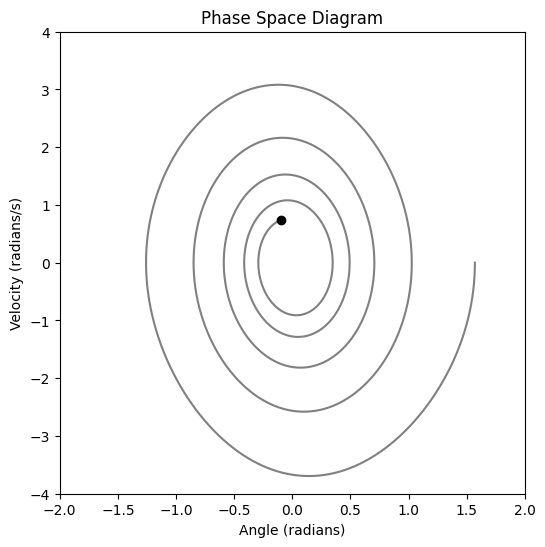

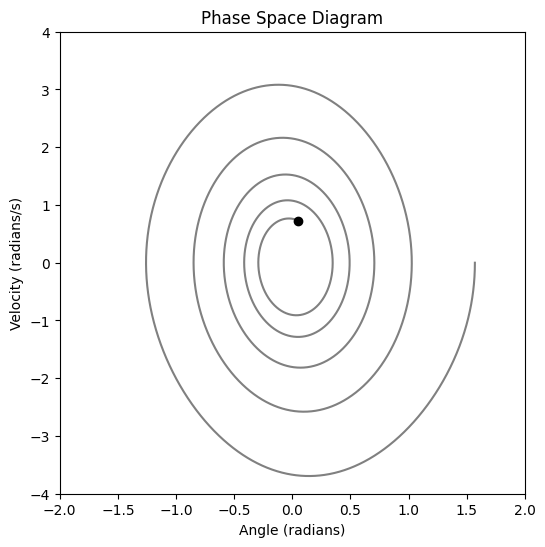

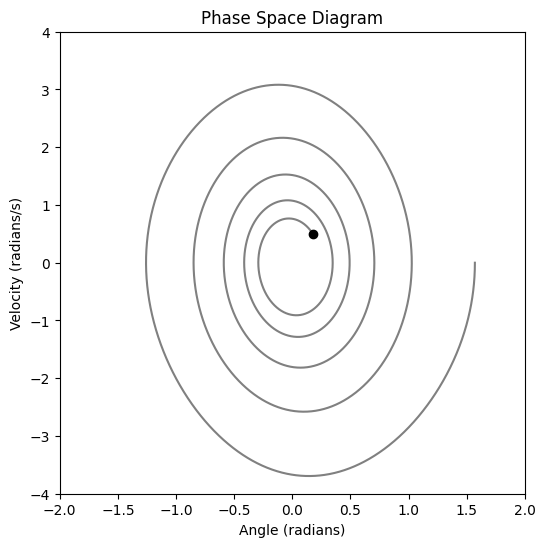

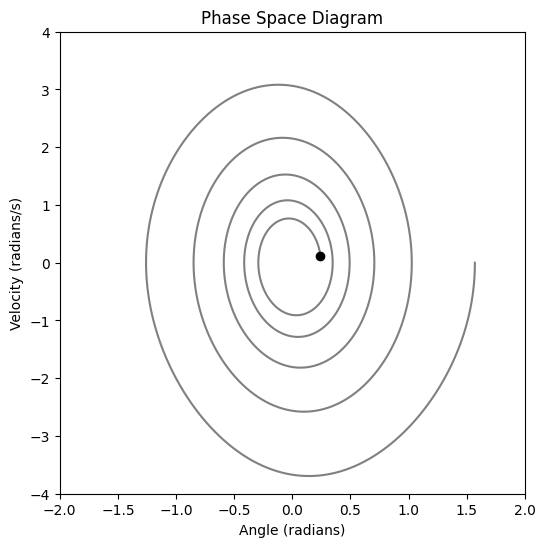

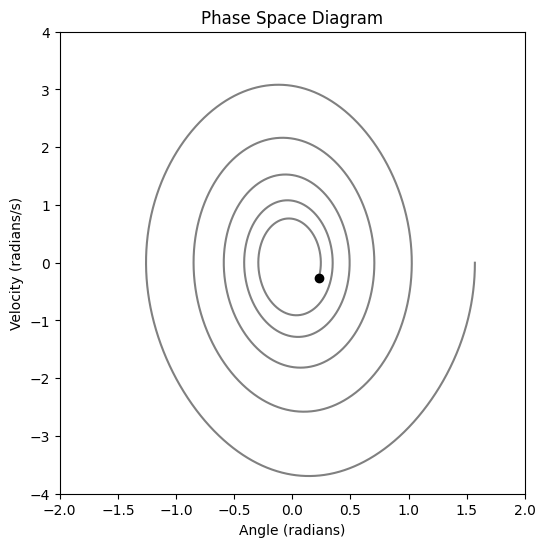

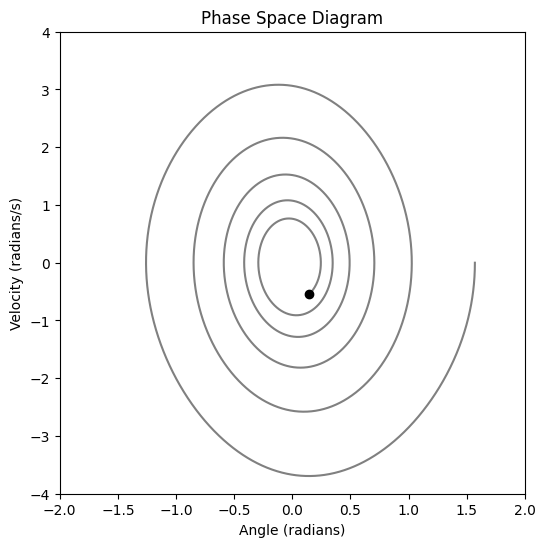

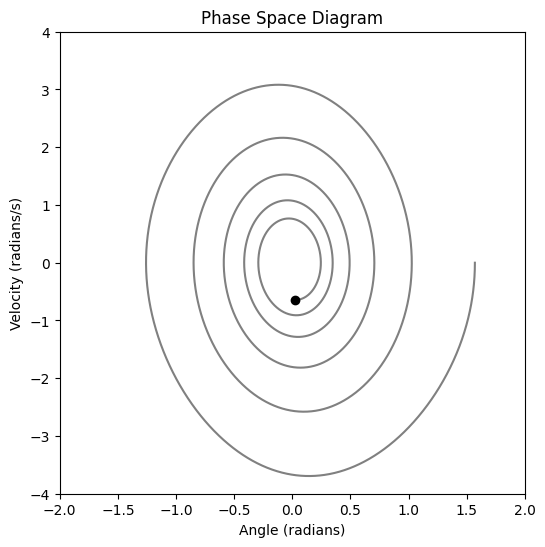

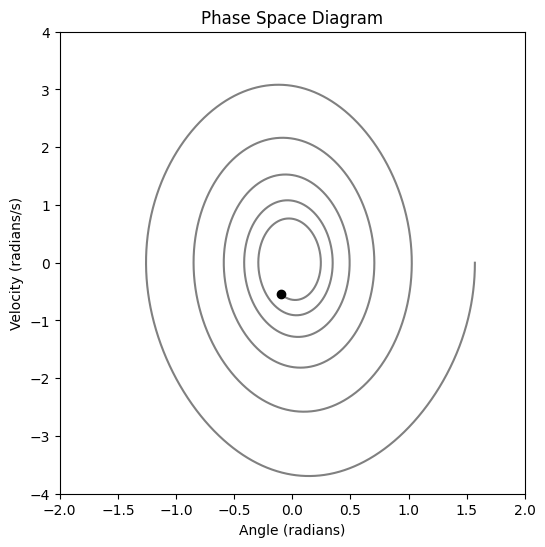

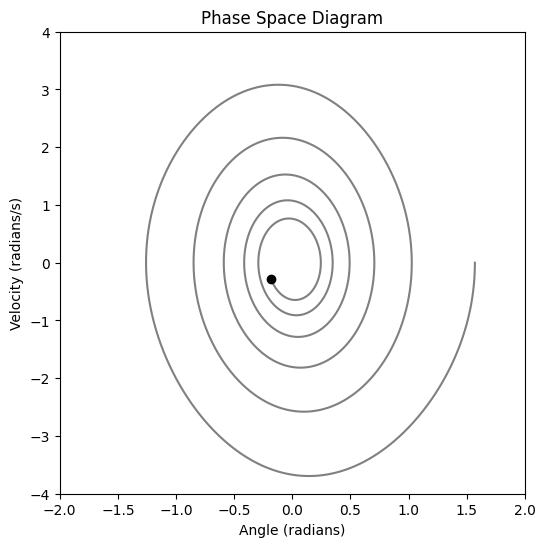

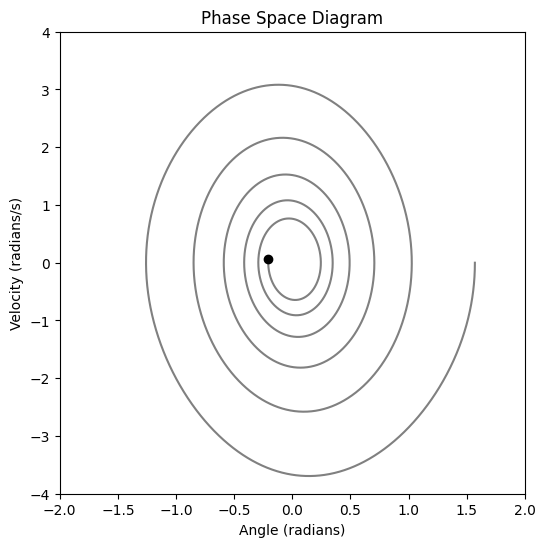

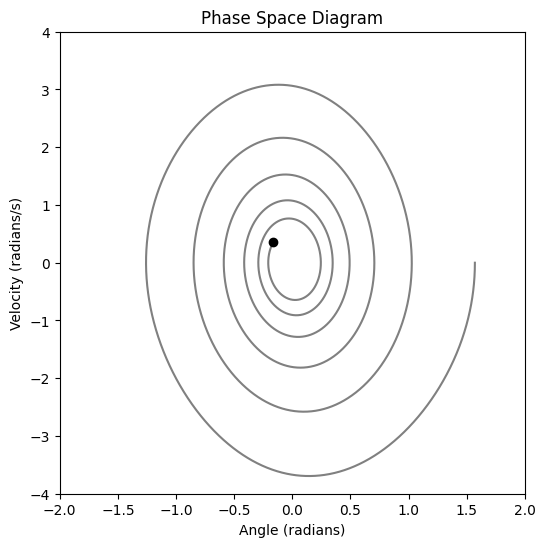

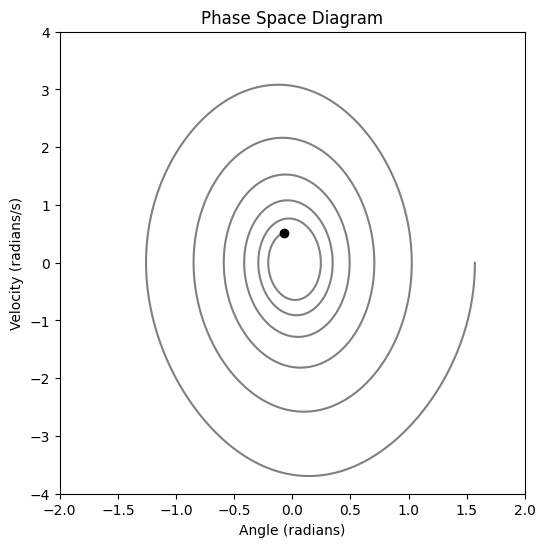

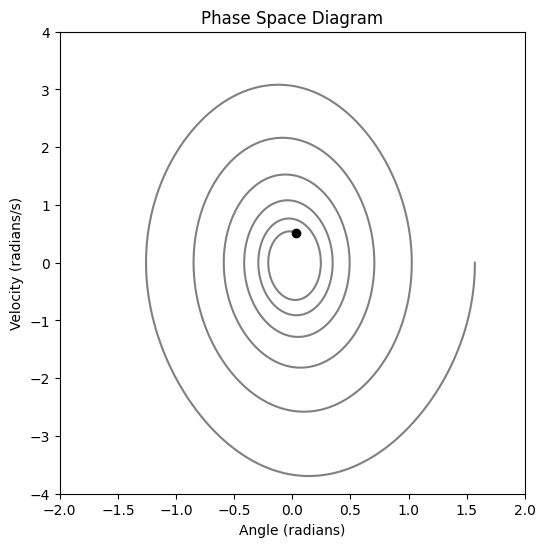

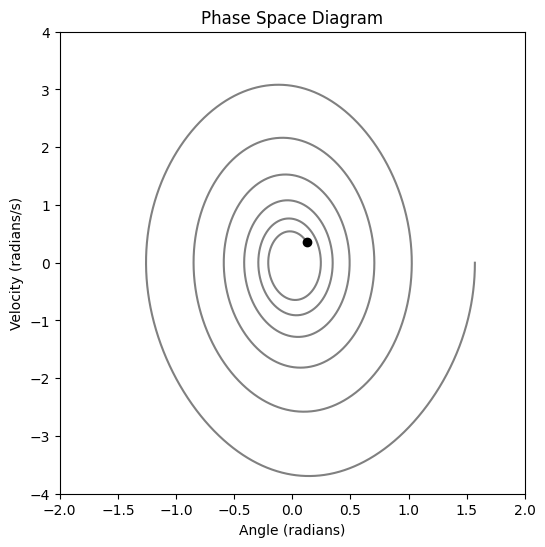

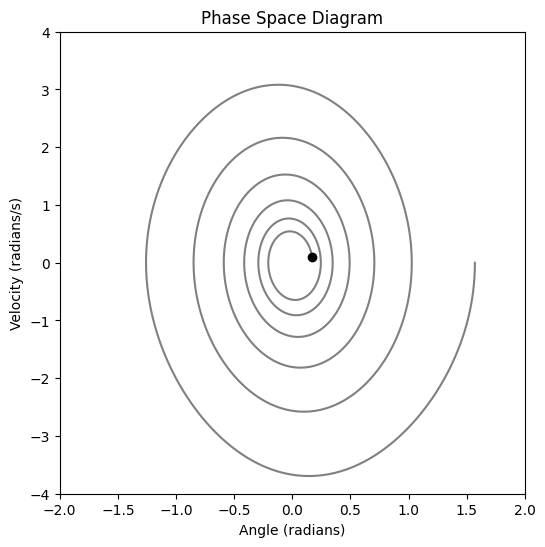

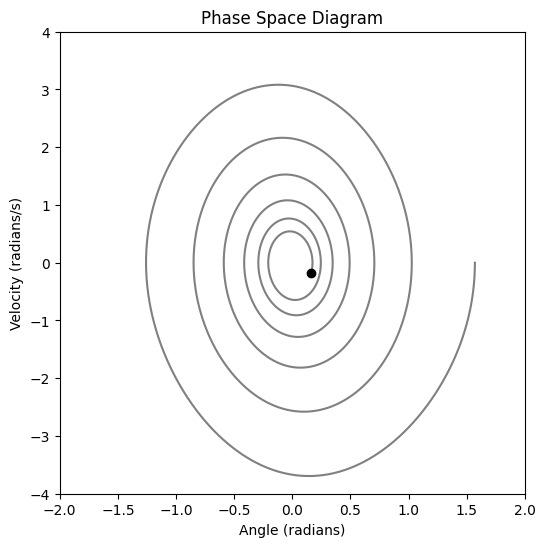

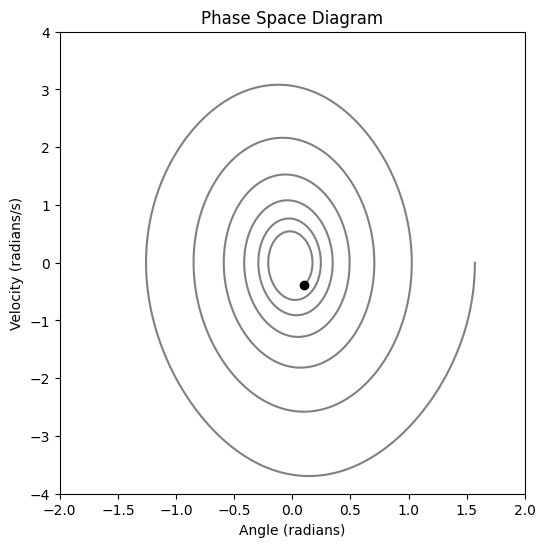

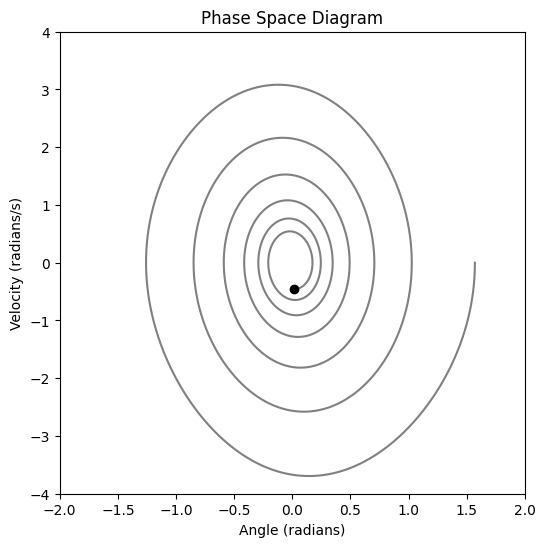

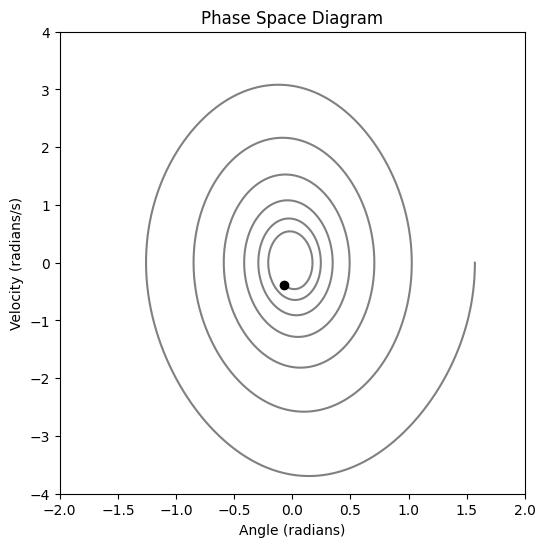

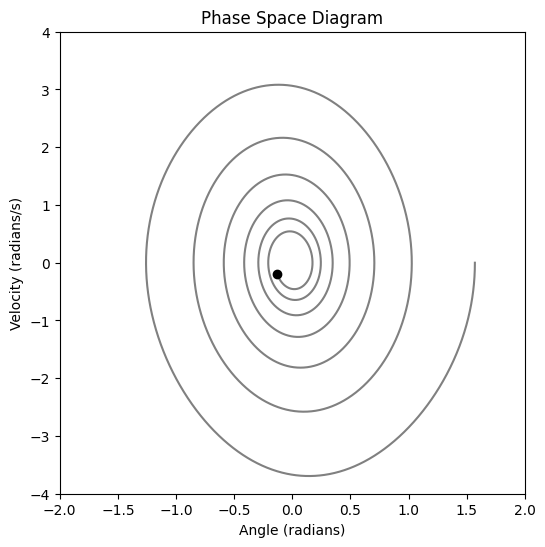

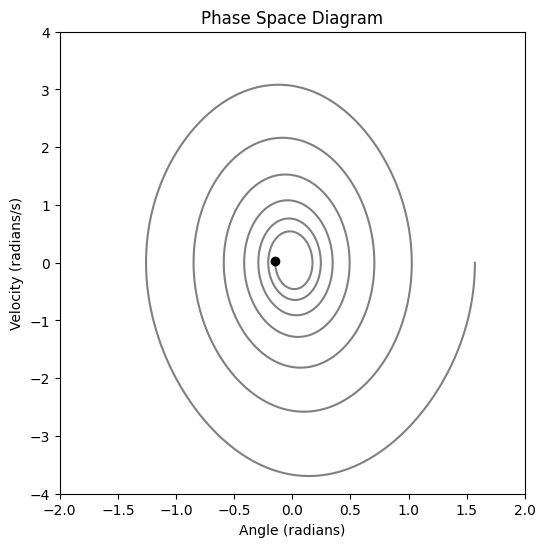

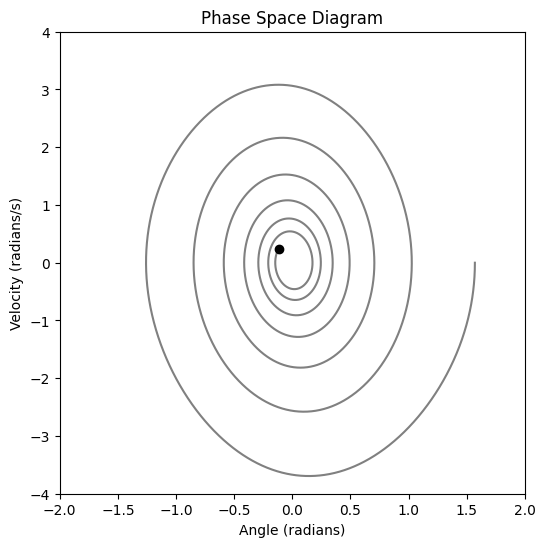

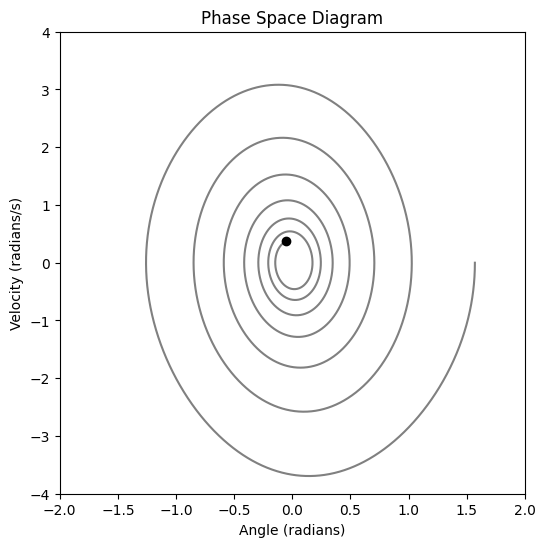

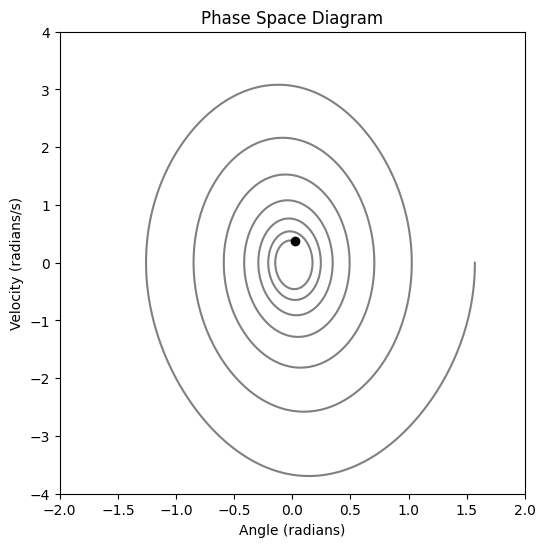

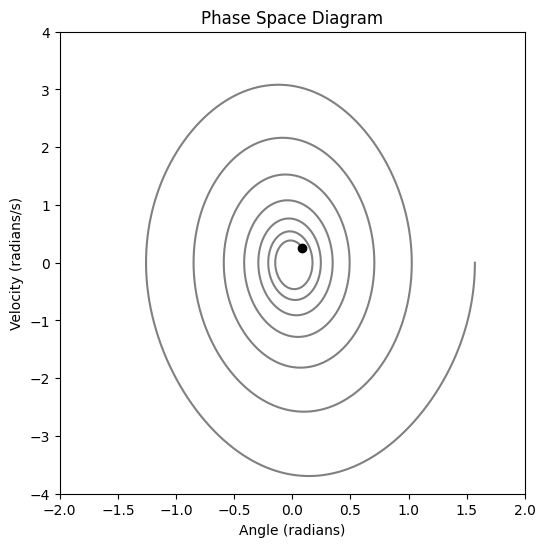

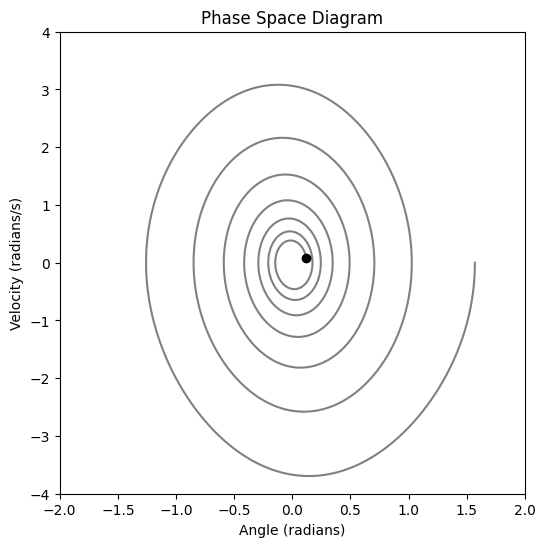

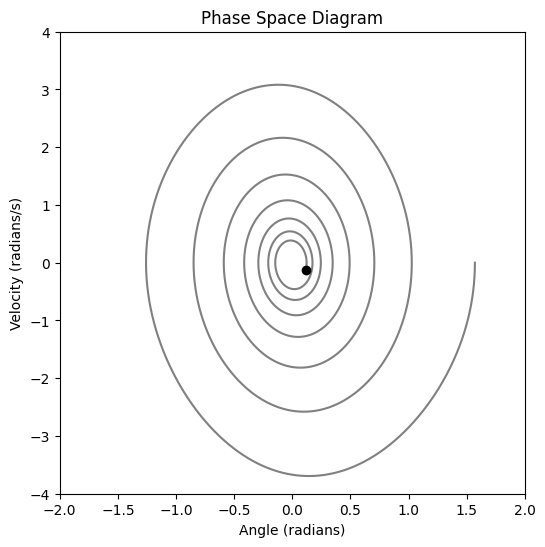

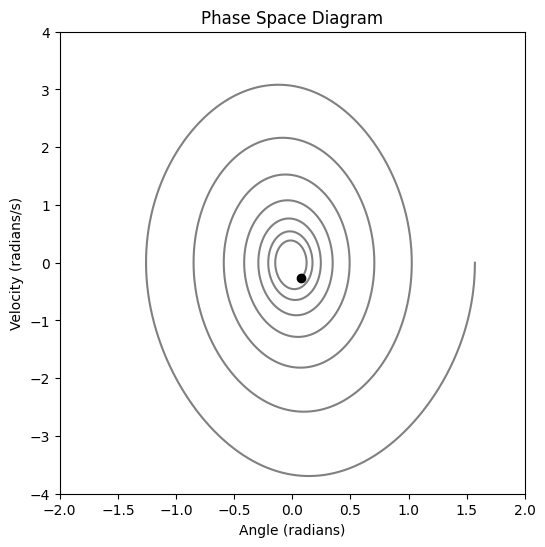

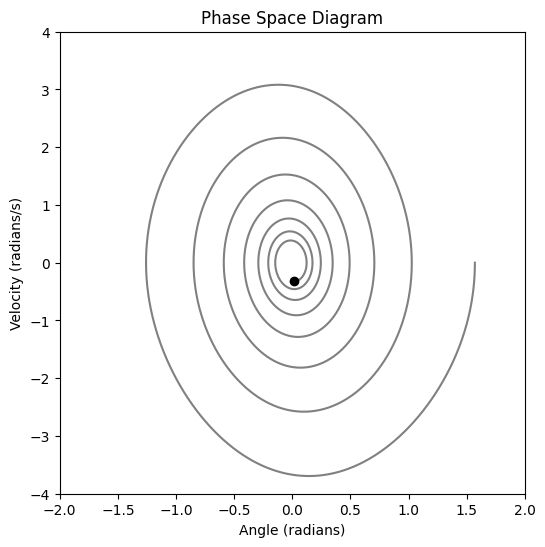

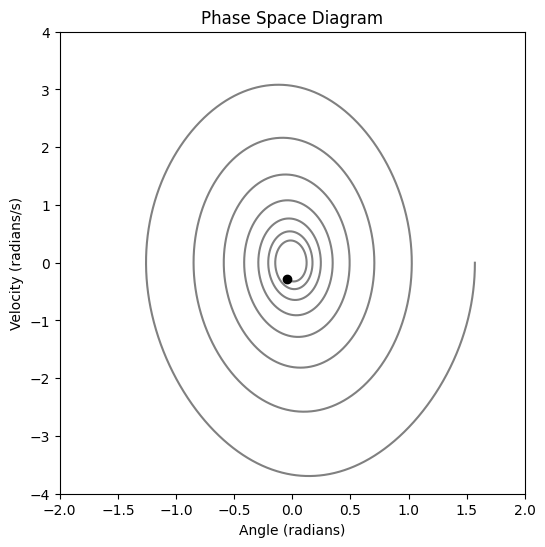

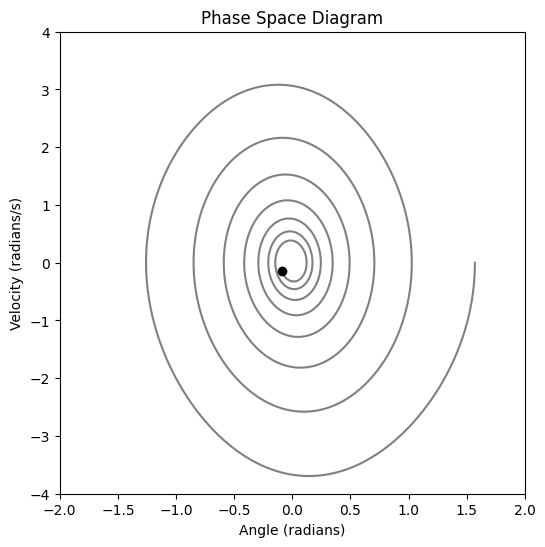

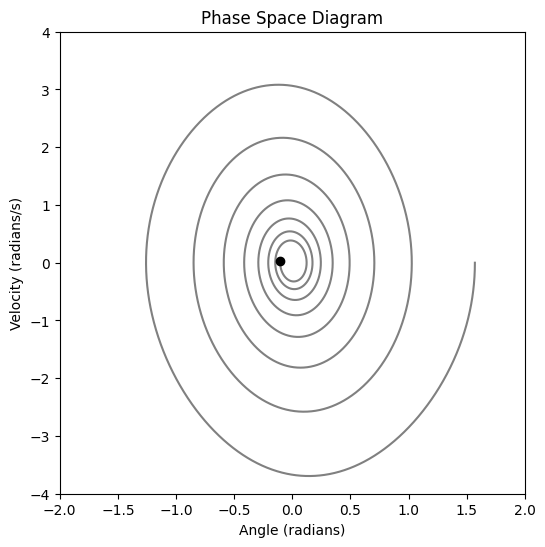

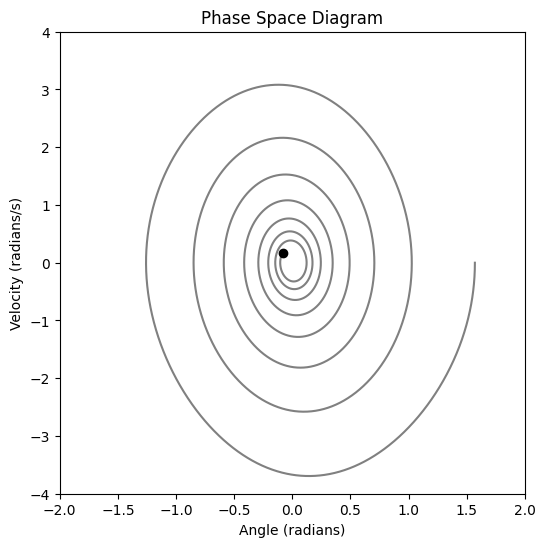

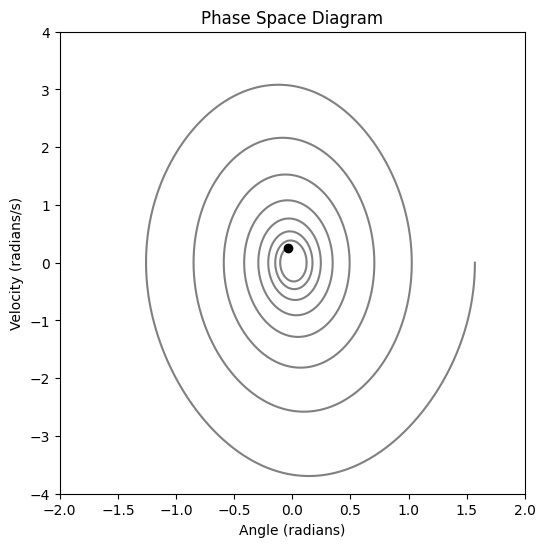

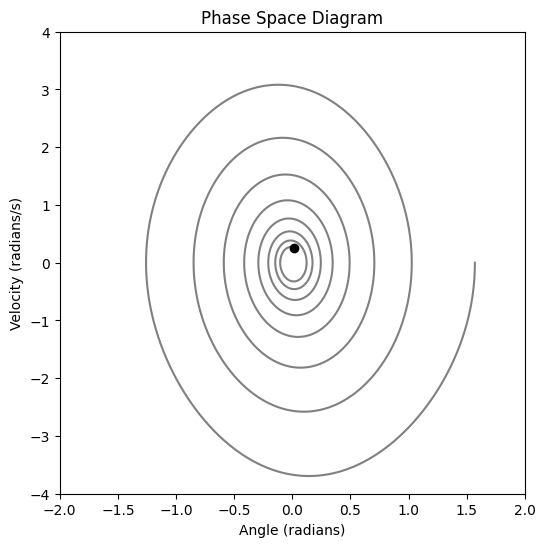

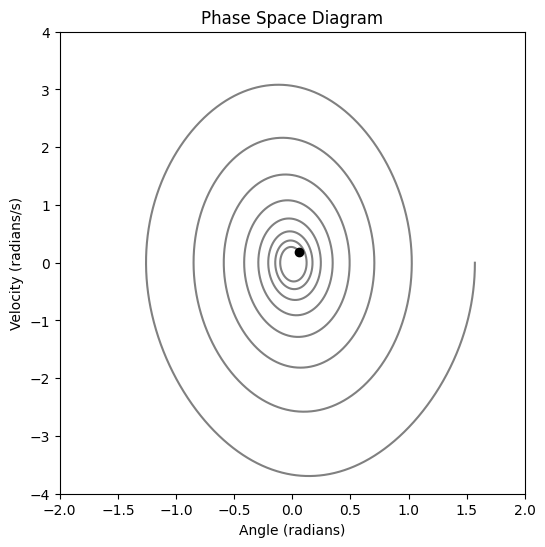

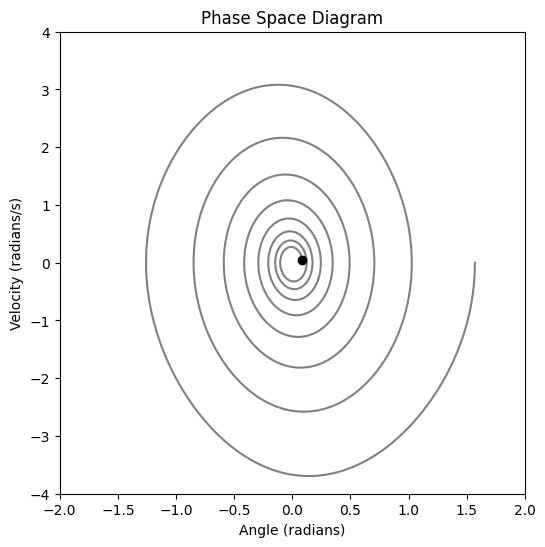

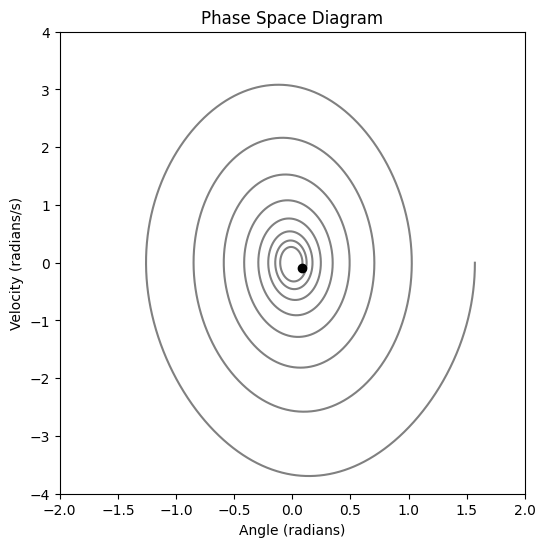

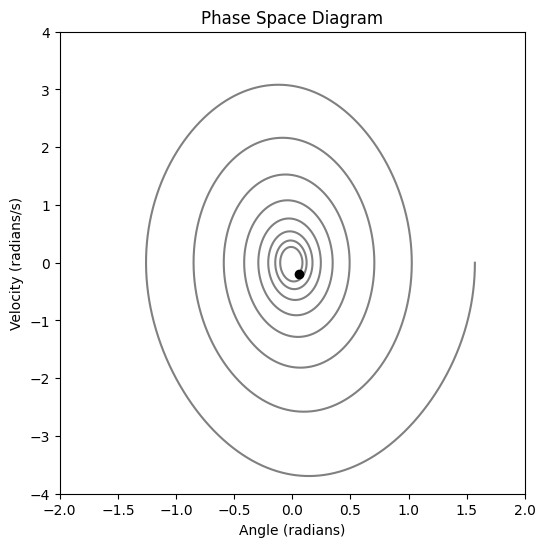

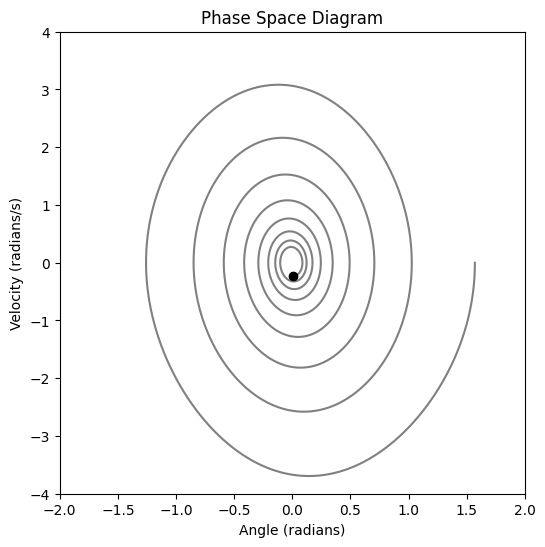

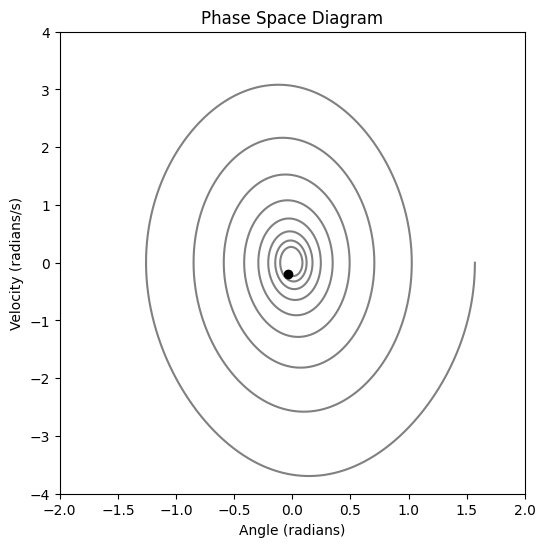

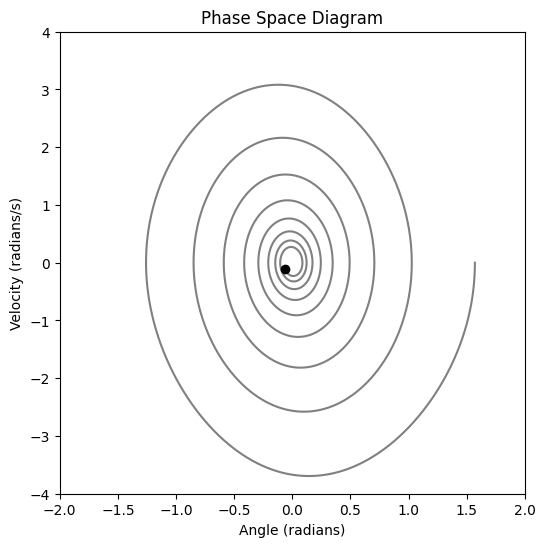

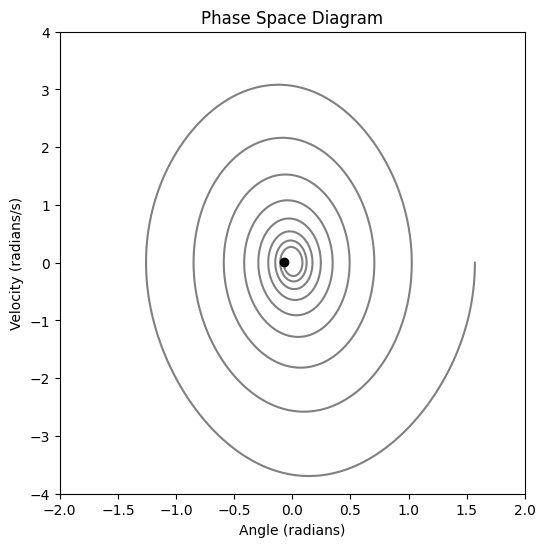

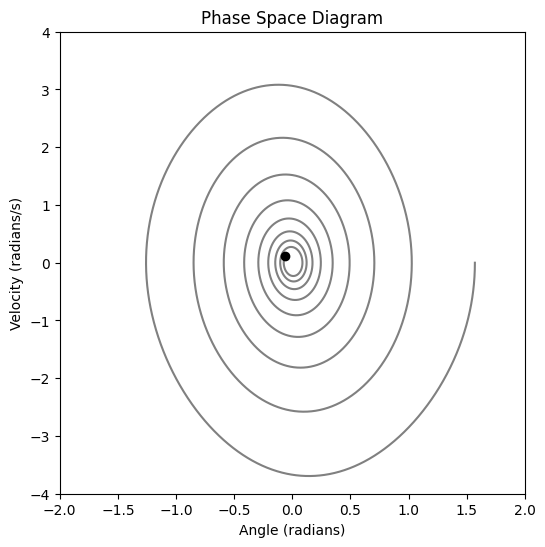

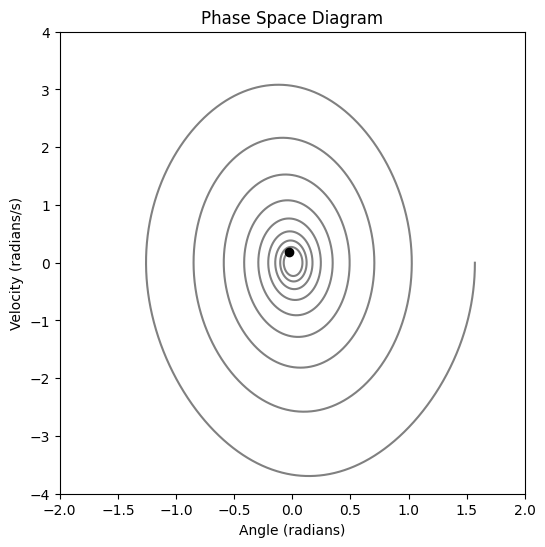

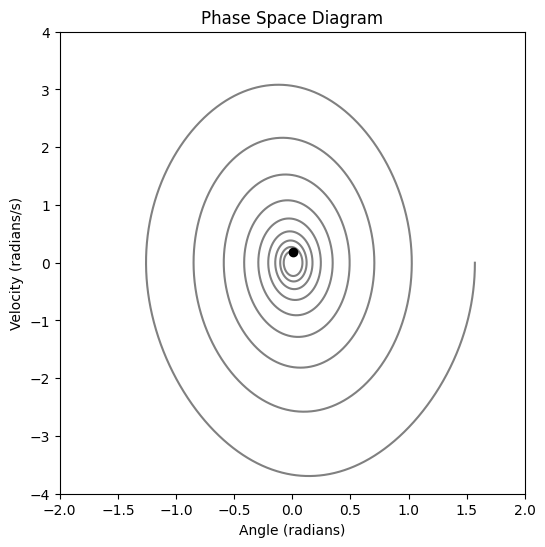

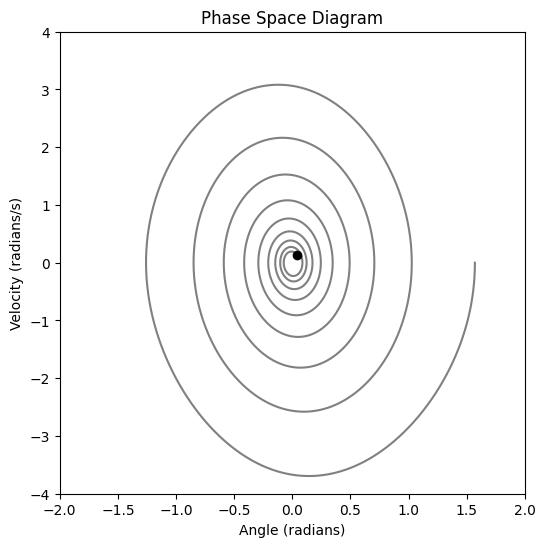

In [18]:
def createFrame(t, x, y):
    fig = pyp.figure(figsize=(6,6))

    pyp.plot(x[:(t+1)], y[:(t+1)], color = "gray")
    pyp.plot(x[t], y[t], color = "blacK", marker = "o")
    pyp.xlim(-2,2)
    pyp.xlabel("Angle (radians)")
    pyp.ylim(-4,4)
    pyp.ylabel("Velocity (radians/s)")
    pyp.title("Phase Space Diagram")

    pyp.savefig(f'./frames/frame_{t}.png',
                transparent = False,
                facecolor = "white")
    
t = 0
while t < len(time_vector):
    createFrame(t, angle_vector, velocity_vector)
    t += 200

In [19]:
frames = []
t = 0
while t < len(time_vector):
    frames.append(imageio.imread(f'./frames/frame_{t}.png'))
    t += 200

imageio.mimsave('./animation.gif', frames)


C:\Users\David\AppData\Local\Temp\ipykernel_23056\1104906717.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'./frames/frame_{t}.png'))


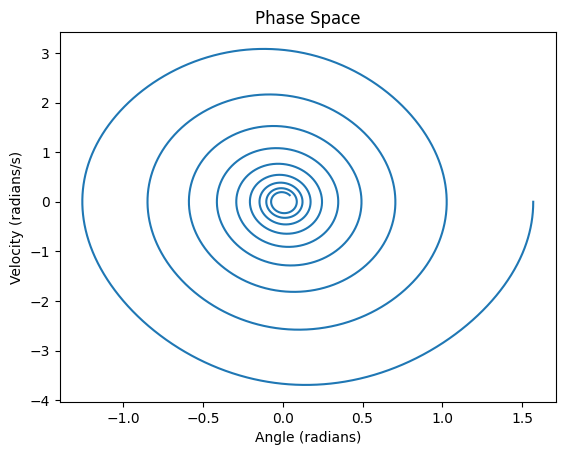

In [20]:
x = angle_vector
y = velocity_vector

pyp.title("Phase Space")
pyp.xlabel("Angle (radians)")
pyp.ylabel("Velocity (radians/s)")
pyp.plot(x, y)
pyp.show()